# Modelamiento Dengue SIR SI

In [53]:
import numpy as np #para manejar matrices
from scipy.integrate import odeint #para resolver ecuaciones diferenciales ordinarias
import matplotlib.pyplot as plt #Para plotear
import math #para la raiz cuadrada

## Modelo SIR - SI

### SIR (Host - Humanos)

$S_h = - \dfrac{ \beta_{vh} S_v I_v}{N_h} $

$I_h = \dfrac{ \beta_{vh} S_v I_v}{N_h} - \gamma I_h$

$ R_h = \gamma I_h$

### SI (Vector - Mosquitos)

$S_v = - \dfrac{ \beta_{hv} S_v I_h}{N_h} - \mu_v S_v$

$I_v = \dfrac{ \beta_{hv} S_v I_h}{N_h} - \mu_v I_v$,

donde $S$ corresponde a la población susceptible,

$I$ corresponde a la población infectada/infecciosa,

$R$ corresponde a la población recuperada,

$N$ es el número total de la población

y los subíndices $v$ y $h$ corresponden a la población de vectores y hosts respectivamente.

En cuanto a los parámetros, estos son:

$\beta_{hv}$: tasa de trasmisibilidad host a vector.

$\beta_{vh}$: tasa de trasmisibilidad vector a host.

$u_v$: tasa de mortalidad de los vectores.

$\gamma$: tasa de recuperación.

Los parámetros $\beta$ están definidos como:

$\beta_{hv} = x_1 b b_h$ 

y

$\beta_{hv} = x_2 b b_m$,

donde $x_1$ y $x_2$ son la probabilidad de transmisión vector-a-host y host-a-vector respectivamente,

$b$ es la tasa de picaduras y, $b_h$ y $b_m$ son la probabilidad de transimisión del virus por picadurad vector-a-host y host-a-vector respectivamente.

In [54]:
T = [-2,0,2,2,7,10,11,17,18,20,22,20,21,23,25,26,27,25,27,27,28,29,30,31,30,32,33,30,32,33,31,30,29,25,26,23,24,25,26,24,23,22,20,19,18,15,17,20,22,18,15,14,12]

In [55]:
def temperatura(t):
    t=t-1
    temp=T[int(t)]
    return temp

Datos de la población de mosquitos (Vector)

In [79]:
N_v = 2000
I0_v = 1
S0_v = N_v - I0_v 

Datos de la población de Humanos (Host)

In [80]:
N_h = 1000
I0_h = 7
R0_h = 0
S0_h = N_h - I0_h

Pamámetros de la ecuación

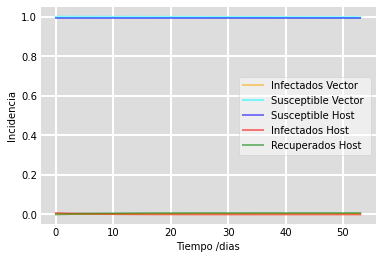

In [85]:
# A grid of time points (in days)
t = np.linspace(0, 53, 53)

# The SIR model differential equations.
def deriv(y, t, N_h, beta_hv, beta_vh,u_v, gammaa):
    Sv, Iv, Sh, Ih, Rh = y
    #T=temperatura(t)
    T=33
    x_1=0.3841
    x_2=1
    
    if(T<=13.35 or T>=40.08):
        b=0
    else:
        b=0.00202*T*(T-13.35) * math.sqrt(40.08 - T)   
    
    if(T<=12.286 or T>=32.461):
        b_h=0
    else:
        b_h=0.001044*T*(T-12.286) * math.sqrt(32.461 - T)
        
    if(T>=12.4 and T<=26.1):
        b_m=-0.9037+0.0727*T
    elif(T>26.1 and T<=32.5):
        b_m=1
    else:
        b_m=0
    
    
    beta_hv=x_2*b*b_m
    beta_vh=x_1*b*b_h
    u_v=(8.692/10000)-((1.590/10000)*T)+((1.116/100000)* (T**2)) - ((3.408/10000000)*(T**3)) + ((3.809/1000000000)*(T**4))
    
    
    gamma= 1./7
    dSvdt = -beta_hv * Sv * Ih/N_h - (u_v*Sv)
    dIvdt = beta_hv * Sv * Ih/N_h - (u_v*Iv)
    dShdt = -beta_vh * Sv * Iv/N_h
    dIhdt = beta_vh * Sv * Iv/N_h -(gamma * Ih)
    dRhdt = gamma * Ih
    return dSvdt, dIvdt,dShdt, dIhdt, dRhdt



# Initial conditions vector
y0 = S0_v, I0_v,S0_h, I0_h, R0_h
# Integrate the SIR equations over the time grid, t.
#ret = odeint(deriv, y0, t, args=(N_h, beta_hv, beta_vh,u_v, gamma))
ret = odeint(derivart, y0, t, args=(N_h, beta_hv, beta_vh,u_v, gamma))
Sv, Iv, Sh, Ih, Rh = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
ax.plot(t, Sh/N_h, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(t, Ih/N_h, 'r', alpha=0.5, lw=2, label='Infectados Host')
ax.plot(t, Rh/N_h, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
ax.set_xlabel('Tiempo /dias')
ax.set_ylabel('Incidencia')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [86]:
def derivart(y, t, N, beta, gamma):
    S, I ,R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt